In [1]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [4]:
df = df.sort_values(by='date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [5]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


1- Resample by the day and take the average temperature. Visualize the average temperature over time. 


In [6]:
df_dayly_average = df.resample('d').mean()
df_dayly_average.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<Axes: xlabel='date'>

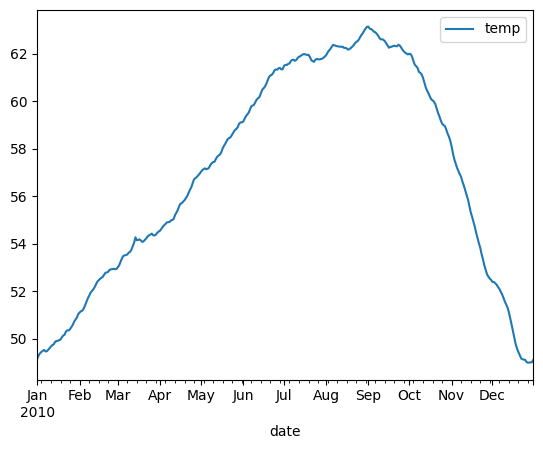

In [7]:
df.resample('d').mean().plot()

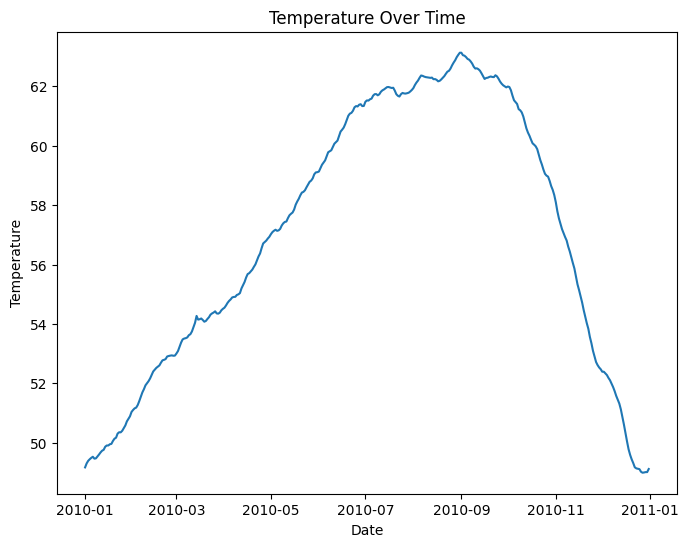

In [8]:
# Plotting the temperature over time
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
plt.plot(df_dayly_average.index, df_dayly_average['temp']) #, marker='o', linestyle='-')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

# Adding grid lines
plt.grid(False)

# Display the plot
plt.show()

2- Write the code necessary to visualize the minimum temperature over time.

In [9]:
df_weekly_min = df.resample('w').min()
df_weekly_min.head()

,temp
date,
2010-01-03,45.8
2010-01-10,46.0
2010-01-17,46.1
2010-01-24,46.2
2010-01-31,46.5


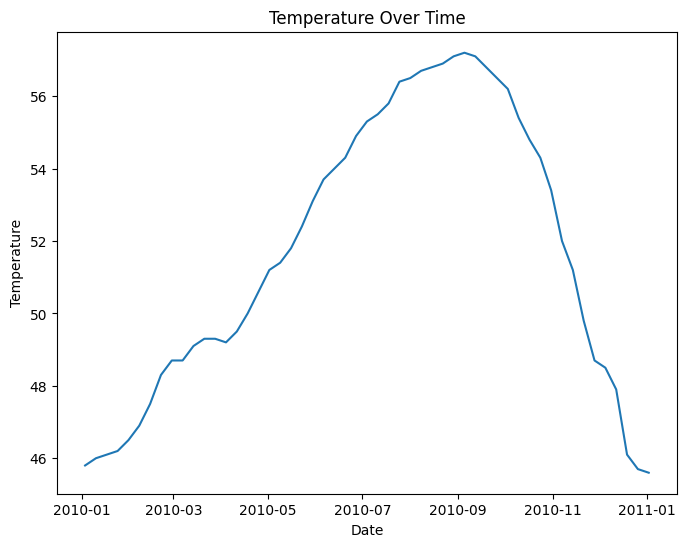

In [10]:
# Plotting the temperature over time
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
plt.plot(df_weekly_min.index, df_weekly_min['temp']) #, marker='o', linestyle='-')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

# Adding grid lines
plt.grid(False)

# Display the plot
plt.show()

3- Write the code necessary to visualize the maximum temperature over time.


In [11]:
df_weekly_max = df.resample('w').max()
df_weekly_max.head()

,temp
date,
2010-01-03,53.5
2010-01-10,54.1
2010-01-17,54.7
2010-01-24,55.3
2010-01-31,56.2


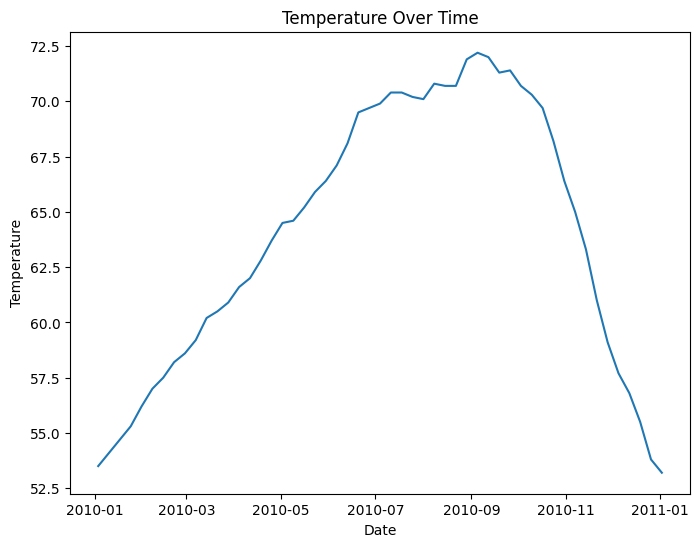

In [12]:
# Plotting the temperature over time
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
plt.plot(df_weekly_max.index, df_weekly_max['temp']) #, marker='o', linestyle='-')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

# Adding grid lines
plt.grid(False)

# Display the plot
plt.show()

4- Which month is the coldest, on average?

`January is the coldest month at an average temperature of 50 degrees`

In [13]:
df_monthly_avg = df.resample('m').mean()
df_monthly_avg['Month'] = df_monthly_avg.index.month_name()
df_monthly_avg[df_monthly_avg['temp'] == df_monthly_avg['temp'].min()]

,temp,Month
date,,
2010-01-31,49.98414,January


In [14]:
df_monthly_avg

,temp,Month
date,,
2010-01-31,49.984140,January
2010-02-28,52.243899,February
2010-03-31,53.956528,March
2010-04-30,55.633056,April
2010-05-31,57.970968,May
2010-06-30,60.444722,June
2010-07-31,61.765457,July
2010-08-31,62.405376,August
2010-09-30,62.487083,September


In [15]:
df_day_avg = df.resample('d').mean()


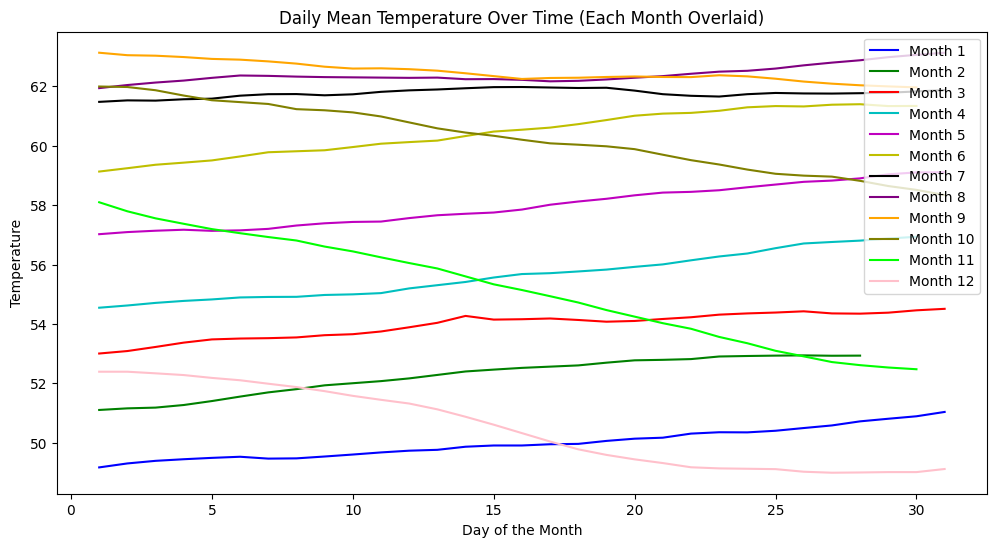

In [16]:
import matplotlib.pyplot as plt

# Assuming df_day_avg is your DataFrame with daily mean temperatures
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)

# Define a list of distinct colors for the lines (12 colors)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'olive', 'lime', 'pink']

# Iterate over each month and plot its line without any shift
for month, group in df_day_avg.groupby(df_day_avg.index.month):
    color = colors[month - 1]  # Use the color corresponding to the month (month - 1 because months are 1-indexed)
    plt.plot(group.index.day, group['temp'], label=f'Month {month}', color=color)  # Use day of the month as x-axis

# Adding labels and title
plt.xlabel('Day of the Month')
plt.ylabel('Temperature')
plt.title('Daily Mean Temperature Over Time (Each Month Overlaid)')

# Adding legend to differentiate each month
plt.legend(loc='upper right')

# Adding grid lines
plt.grid(False)

# Display the plot
plt.show()


5- Which month has the highest average temperature?

`September has the highest average temperature at 62 degrees`

In [17]:
df_monthly_avg = df.resample('m').mean()
df_monthly_avg['Month'] = df_monthly_avg.index.month_name()
df_monthly_avg[df_monthly_avg['temp'] == df_monthly_avg['temp'].max()]

,temp,Month
date,,
2010-09-30,62.487083,September


6- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

`July has the highest daily temperature variability`


In [18]:
df_daily_agg = df.resample('d').agg(['min', 'max'])
df_daily_agg.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [19]:
# Calculate the absolute difference between 'temp' 'max' and 'temp' 'min' columns
df_daily_agg['change'] = (df_daily_agg['temp']['max'] - df_daily_agg['temp']['min']).abs()
df_daily_agg.head()

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7

In [20]:
df_monthly_agg = df_daily_agg.resample('m').sum()

df_monthly_agg['month'] = df_monthly_avg.index.month_name()

df_monthly_agg[df_monthly_agg['change'] == df_monthly_agg['change'].max()]


temp         change month
               min     max             
date                                   
2010-07-31  1737.4  2170.7  433.3  July

In [21]:
df_weekly_min = df.resample('w').min()
df_weekly_min.head()

,temp
date,
2010-01-03,45.8
2010-01-10,46.0
2010-01-17,46.1
2010-01-24,46.2
2010-01-31,46.5


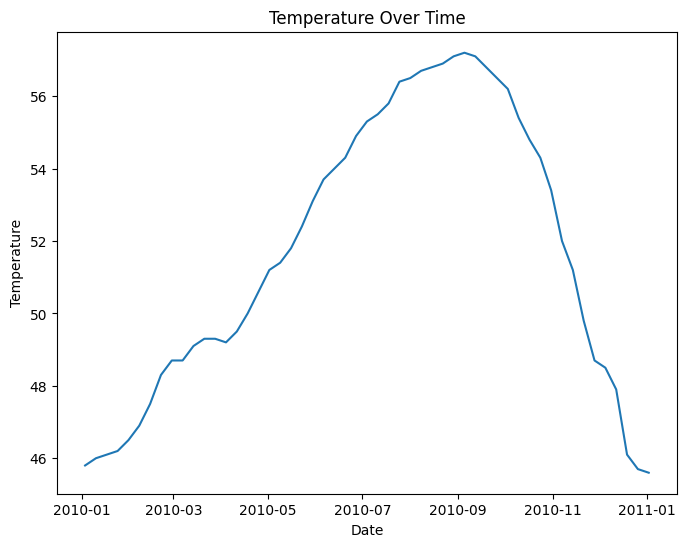

In [22]:
# Plotting the temperature over time
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
plt.plot(df_weekly_min.index, df_weekly_min['temp']) #, marker='o', linestyle='-')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

# Adding grid lines
plt.grid(False)

# Display the plot
plt.show()

7- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [23]:
df_agg = df.resample('d').agg(['min', 'mean', 'max'])

df_agg['month'] = df_agg.index.month_name()

df_agg

temp                      month
             min       mean   max          
date                                       
2010-01-01  45.8  49.170833  53.3   January
2010-01-02  46.0  49.304167  53.4   January
2010-01-03  46.1  49.391667  53.5   January
2010-01-04  46.1  49.445833  53.6   January
2010-01-05  46.1  49.491667  53.8   January
...          ...        ...   ...       ...
2010-12-27  45.6  48.991667  53.2  December
2010-12-28  45.6  49.000000  53.2  December
2010-12-29  45.6  49.012500  53.2  December
2010-12-30  45.6  49.012500  53.2  December
2010-12-31  45.8  49.116667  53.2  December

[365 rows x 4 columns]

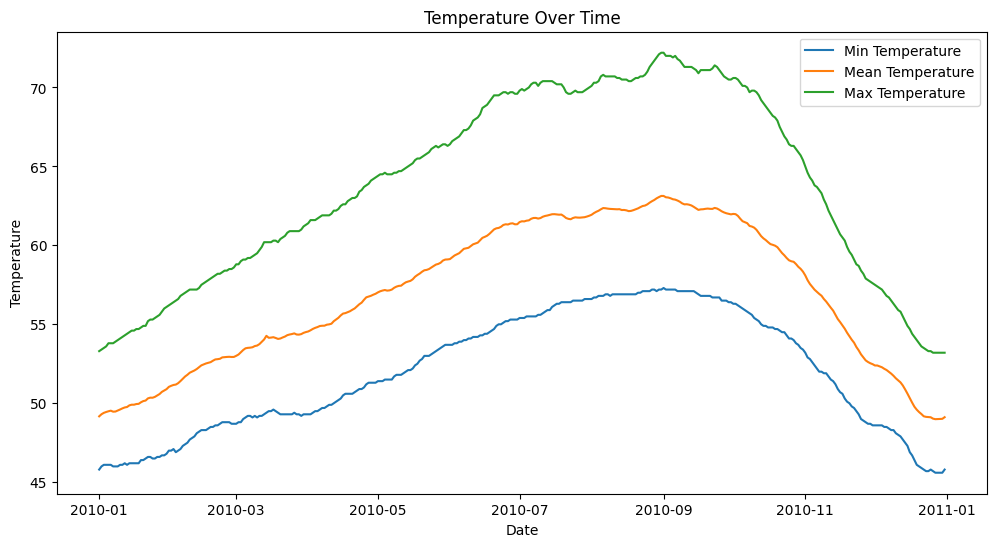

In [24]:
import matplotlib.pyplot as plt

# Assuming df_agg is your DataFrame
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)

# Plot the "min," "mean," and "max" temperatures over time
plt.plot(df_agg.index, df_agg['temp']['min'], label='Min Temperature')
plt.plot(df_agg.index, df_agg['temp']['mean'], label='Mean Temperature')
plt.plot(df_agg.index, df_agg['temp']['max'], label='Max Temperature')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

# Adding legend to differentiate the temperature types
plt.legend(loc='upper right')

# Adding grid lines
plt.grid(False)

# Display the plot
plt.show()


<Axes: xlabel='date'>

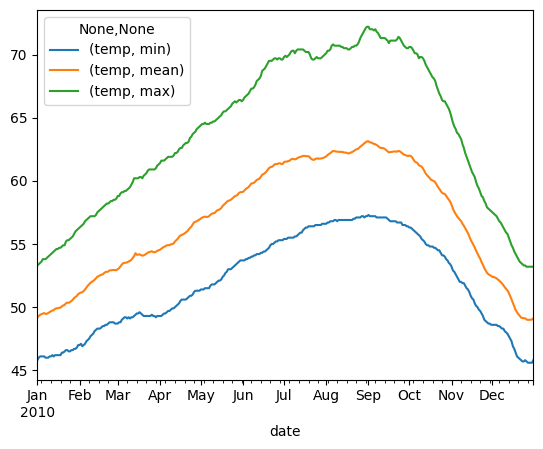

In [25]:
df.resample('d').agg(['min', 'mean', 'max']).plot()

In [88]:
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [89]:
weather = weather.set_index('date')
weather.head()
weather = weather.sort_values(by='date')
weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


1- Which year and month combination has the highest amount of precipitation?

In [78]:
monthly_precipitation = weather['precipitation'].resample('M').sum().to_frame()
monthly_precipitation['month'] = monthly_precipitation.index.month_name()

In [79]:
monthly_precipitation[monthly_precipitation['precipitation'] == monthly_precipitation['precipitation'].max()]

,precipitation,month
date,,
2015-12-31,284.5,December


2- Visualize the amount of monthly precipitation over time.

<Axes: xlabel='date'>

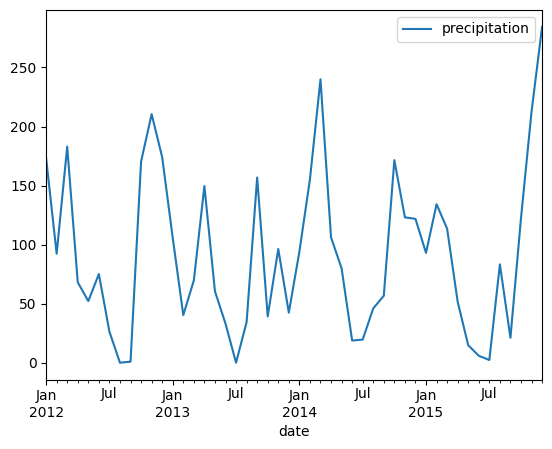

In [80]:
weather['precipitation'].resample('m').sum().to_frame().plot()


3- Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<Axes: xlabel='date'>

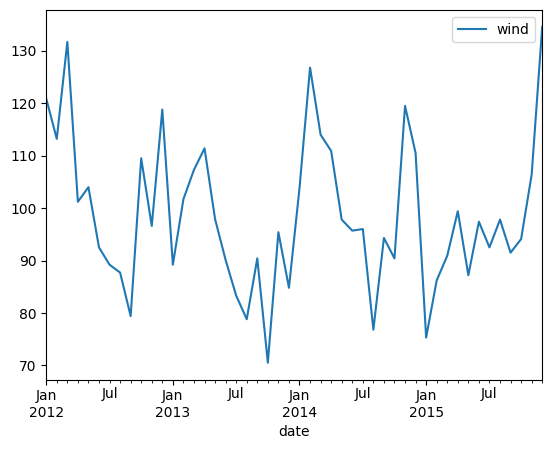

In [81]:
weather['wind'].resample('m').sum().to_frame().plot()


Which year-month combination is the windiest?

In [82]:
monthly_wind = weather['wind'].resample('M').sum().to_frame()
monthly_wind['month'] = monthly_wind.index.month_name()

In [83]:
monthly_wind[monthly_wind['wind'] == monthly_wind['wind'].max()]

,wind,month
date,,
2015-12-31,134.6,December


What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [95]:
monthly_weather_counts = weather[weather['weather'] == 'sun'].resample('M').size()


In [98]:
monthly_weather_counts

date
2012-01-31     4
2012-02-29     8
2012-03-31     6
2012-04-30     8
2012-05-31    14
2012-06-30    10
2012-07-31    12
2012-08-31    24
2012-09-30    18
2012-10-31    11
2012-11-30     2
2012-12-31     1
2013-01-31     6
2013-02-28     2
2013-03-31     9
2013-04-30    14
2013-05-31    21
2013-06-30    25
2013-07-31    27
2013-08-31    27
2013-09-30    17
2013-10-31    18
2013-11-30    17
2013-12-31    22
2014-01-31    20
2014-02-28    11
2014-03-31    11
2014-04-30    20
2014-05-31    24
2014-06-30    24
2014-07-31    25
2014-08-31    23
2014-09-30    17
2014-10-31    11
2014-11-30    14
2014-12-31    11
2015-01-31     3
2015-02-28     9
2015-03-31    16
2015-04-30    19
2015-05-31    23
2015-06-30    26
2015-07-31    25
2015-08-31    20
2015-09-30    19
2015-10-31     5
2015-11-30     9
2015-12-31     6
Freq: M, dtype: int64